In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [2]:
# bring in reddit data
df = pd.DataFrame(pd.read_csv('../resources/reddit_wsb.csv'))
df['Date'] = df.timestamp.str[:10]
df = df.loc[df.Date >= '01-01-2021']
df.head()

,title,score,id,url,comms_num,created,body,timestamp,Date
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28


Number of WSB posts conataining mentioning "GME": 7215
That is 21.18% of all posts in 2021!


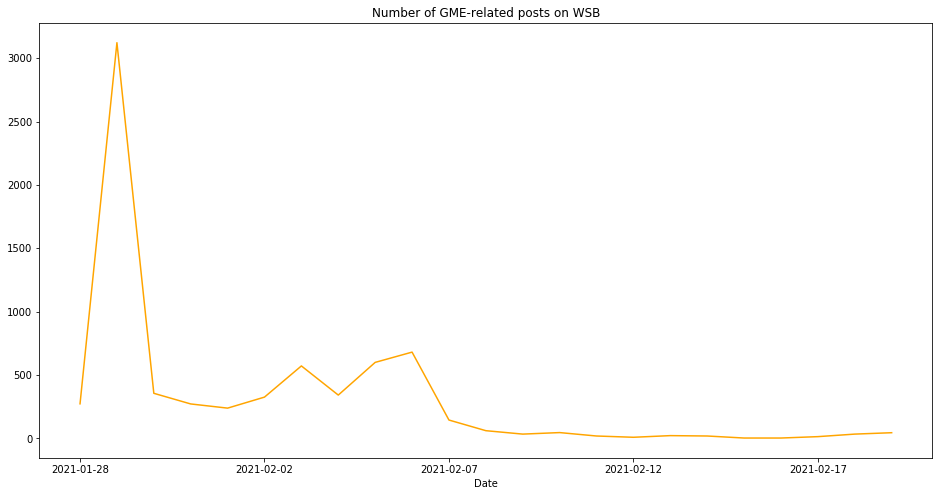

In [3]:
# limit DF to GME posts
gme_df = df.loc[df.title.str.lower().str.contains('gme') | df.title.str.lower().str.contains('gamestop')].reset_index()
gme_post_num = gme_df.title.count()
print(f'Number of WSB posts conataining mentioning "GME": {gme_post_num}')
print(f'That is {round(((gme_post_num/df.title.count())*100),2)}% of all posts in 2021!')
gme_df.groupby('Date').size().plot(\
                                   figsize=(16,8),\
                                   c='orange',\
                                   title='Number of GME-related posts on WSB'\
                                  )
plt.ioff()

In [4]:
# bring in GME data using yahoo finance library
stock = 'GME'
gme = yf.Ticker(stock)
stock_df = gme.history(interval="1d", start="2021-01-01", end="2021-02-19")

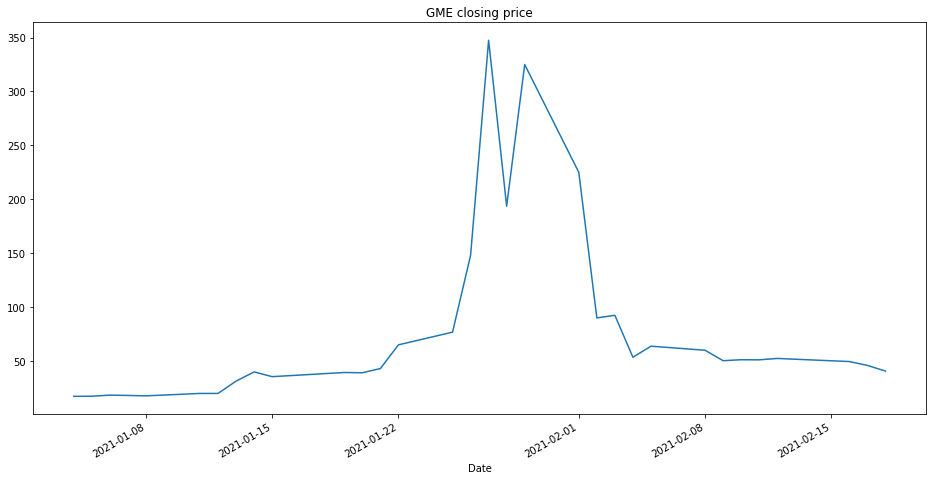

In [5]:
# plot closing GME price
closing = stock_df['Close']
closing.plot(figsize=(16,8), title='GME closing price')
plt.ioff()

In [6]:
stock_df = stock_df.reset_index()
stock_df['Date'] = stock_df['Date'].astype(str)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04,19.000000,19.100000,17.15,17.250000,10022500,0,0
1,2021-01-05,17.350000,18.080000,17.23,17.370001,4961500,0,0
2,2021-01-06,17.340000,18.980000,17.33,18.360001,6056200,0,0
3,2021-01-07,18.469999,19.450001,18.02,18.080000,6129300,0,0
4,2021-01-08,18.180000,18.299999,17.08,17.690001,6482000,0,0


In [7]:
# calculate number of GME-related posts per day
gme_posts = pd.DataFrame(df.groupby('Date').size())\
    .reset_index().rename(columns={0:'Number of posts'})
gme_posts.head()

,Date,Number of posts
0,2020-09-29,1
1,2021-01-28,1197
2,2021-01-29,15694
3,2021-01-30,1424
4,2021-01-31,939


In [8]:
# Merge DFs
merged_df = stock_df.merge(gme_posts, on='Date', how='outer')

# Fill NaN values in comments with 0 
merged_df['Number of posts'] = merged_df['Number of posts'].fillna(value=0)
merged_df = merged_df.sort_values('Date')


# Fill weekend stock info with Friday values
stock_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
merged_df[stock_columns] = merged_df[stock_columns].fillna(method='ffill')
merged_df = merged_df.dropna(how='any')

# Convert Date column to datetime and set it to index
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df = merged_df.set_index('Date')

merged_df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Number of posts
Date,,,,,,,,
2021-01-04,19.000000,19.100000,17.150000,17.250000,10022500.0,0.0,0.0,0.0
2021-01-05,17.350000,18.080000,17.230000,17.370001,4961500.0,0.0,0.0,0.0
2021-01-06,17.340000,18.980000,17.330000,18.360001,6056200.0,0.0,0.0,0.0
2021-01-07,18.469999,19.450001,18.020000,18.080000,6129300.0,0.0,0.0,0.0
2021-01-08,18.180000,18.299999,17.080000,17.690001,6482000.0,0.0,0.0,0.0
2021-01-11,19.410000,20.650000,19.010000,19.940001,14927600.0,0.0,0.0,0.0
2021-01-12,19.959999,20.400000,19.320000,19.950001,7060700.0,0.0,0.0,0.0
2021-01-13,20.420000,38.650002,20.030001,31.400000,144501700.0,0.0,0.0,0.0
2021-01-14,38.090000,43.060001,33.049999,39.910000,93717400.0,0.0,0.0,0.0


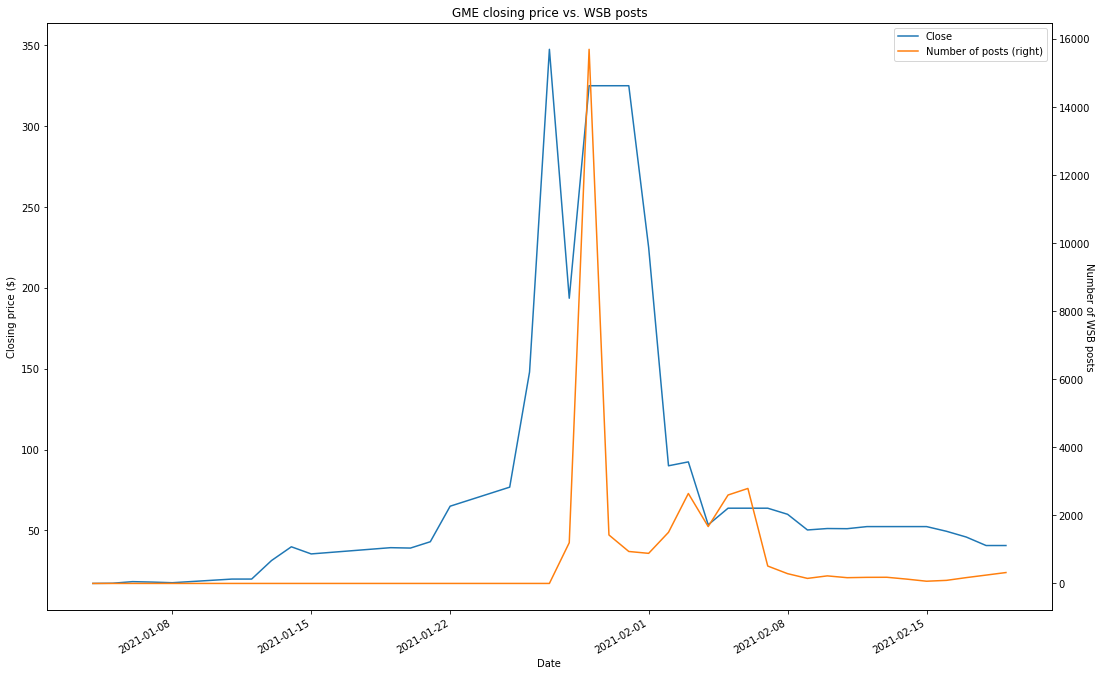

In [9]:
# plot number of posts against stock price
closing = merged_df['Close']
posts = merged_df['Number of posts']
closing.plot(figsize=(18,12), title=('GME closing price vs. WSB posts'), legend=True)
plt.ylabel('Closing price ($)')
posts.plot(secondary_y=True, legend=True)
plt.ylabel('Number of WSB posts', rotation=-90)
plt.ioff()

## For dark-themed notebook
# color1 = 'white'
# color2 = 'black'
# plt.rcParams['text.color'] = color1
# plt.rcParams['axes.labelcolor'] = color1
# plt.rcParams['xtick.color'] = color1
# plt.rcParams['ytick.color'] = color1

In [10]:
# calculate number of diamond posts per day
diamond_posts = pd.DataFrame(df.loc[df.title.str.lower().str.contains('💎')]\
    .groupby('Date').size()).rename(columns={0:'Diamond posts'})

# change index to datetime
diamond_posts = diamond_posts.reset_index()
diamond_posts['Date'] = pd.to_datetime(diamond_posts['Date'])
diamond_posts = diamond_posts.set_index('Date')

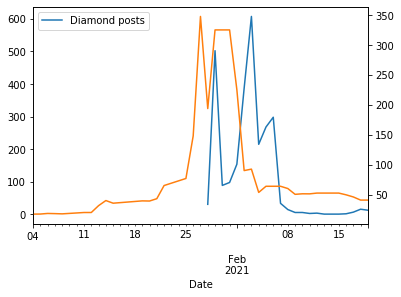

In [11]:
diamond_posts.plot()
closing.plot(secondary_y=True)

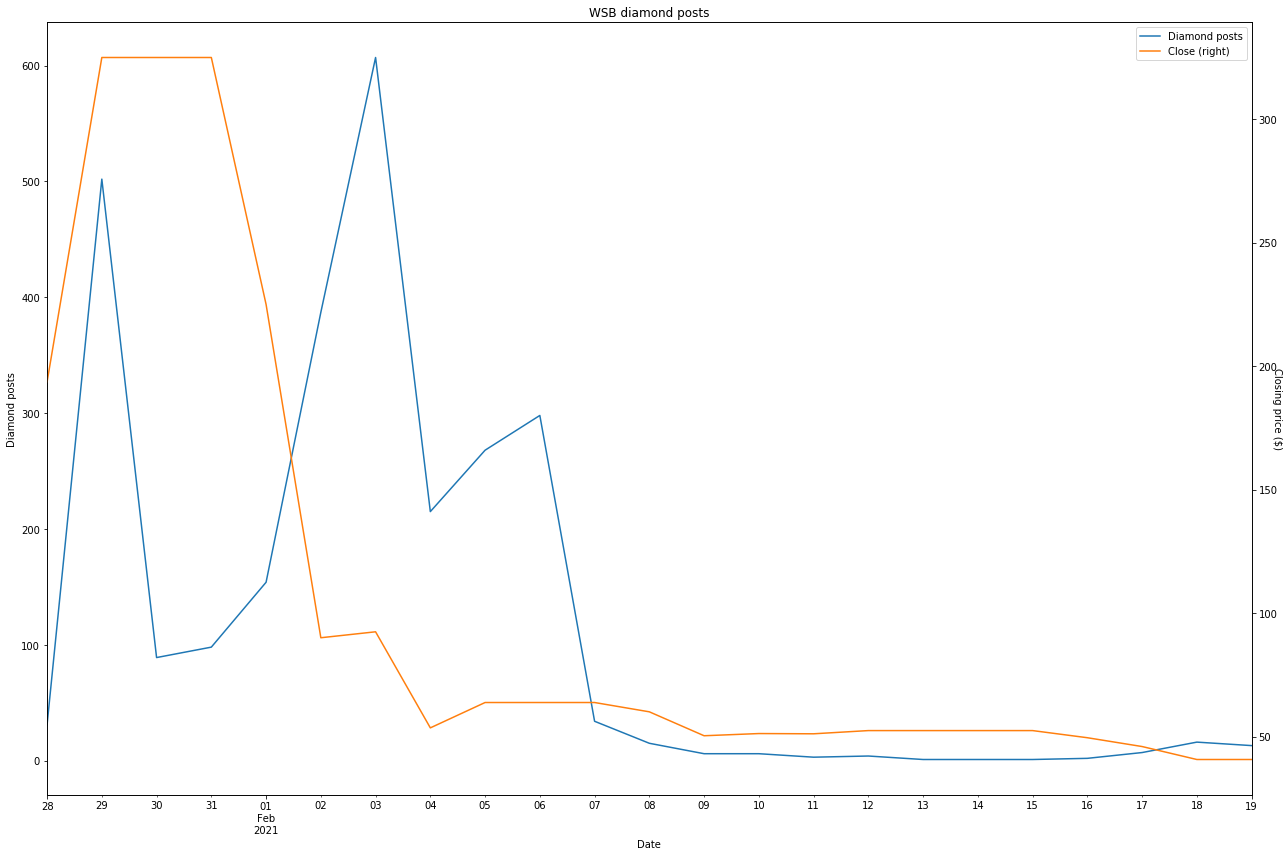

In [12]:
# limit closing dates to WSB data dates
short_closing = closing.loc[closing.index >= diamond_posts.index.min()]

# plot both lines
diamond_posts.plot(figsize=(18,12), title=('WSB diamond posts'), legend=True)
plt.ylabel('Diamond posts')
short_closing.plot(secondary_y=True, legend=True)
plt.ylabel('Closing price ($)', rotation=-90)
plt.tight_layout()
plt.ioff()